In [3]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('weight-height.csv')

In [51]:
df.head(500)

,Height,Weight,Female,Male
0,73.847017,241.893563,0,1
1,68.781904,162.310473,0,1
2,74.110105,212.740856,0,1
3,71.730978,220.042470,0,1
4,69.881796,206.349801,0,1
...,...,...,...,...
497,68.874707,191.833709,0,1
498,71.080084,209.853554,0,1
499,72.182534,201.261464,0,1
500,72.062755,208.781853,0,1


In [6]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [7]:
df.shape

(8555, 3)

In [8]:
# from PIL import Image
# img =   Image.open('out.gif')

<AxesSubplot:xlabel='Weight', ylabel='Count'>

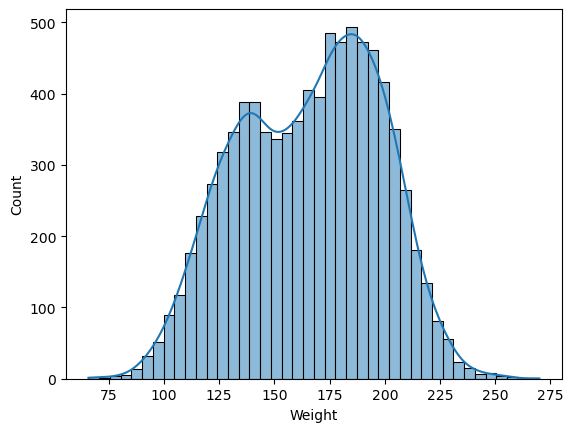

In [9]:
sbn.histplot(df['Weight'],kde=True)

In [10]:
mean_value = df['Weight'].mean()

In [11]:
mean_value

165.63273532667586

<AxesSubplot:xlabel='Weight', ylabel='Count'>

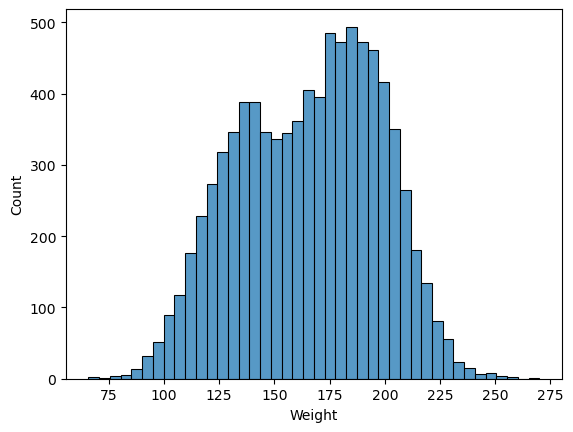

In [12]:
sbn.histplot(df['Weight'],kde=False)

In [13]:
std_value = df['Weight'].std()

In [14]:
std_value

32.04392221721549

In [15]:
# Right site
std_3 = mean_value + ( 3* std_value)

In [16]:
std_3

261.7645019783223

In [17]:
# left site
left_std_3 = mean_value - ( 3* std_value)

In [18]:
left_std_3

69.50096867502938

In [19]:
df[df['Weight'] > std_3]

,Gender,Height,Weight
2014,Male,78.998742,269.989698


In [20]:
df[df['Weight'] < left_std_3]

,Gender,Height,Weight
151,Male,65.350411,65.78000
160,Male,64.333648,68.64000
5360,Female,55.668202,68.98253


In [21]:
merge = df[(df['Weight'] > std_3) | (df['Weight'] < left_std_3)]

In [22]:
merge.shape

(4, 3)

# Without counting the outlayer 

In [23]:
remove_out = df[(df['Weight'] < std_3) & (df['Weight'] > left_std_3)]

In [24]:
remove_out.shape

(8551, 3)

In [25]:
sns.histplot(remove_out['Weight'],kde = True)

NameError: name 'sns' is not defined

# One Hot Encoding

In [52]:

dummy_variables = pd.get_dummies(remove_out['Gender'],drop_first= True)

In [53]:
# dummy_variables = pd.get_dummies(remove_out['Gender'],drop_first= False)

In [54]:
dummy_variables.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [55]:
#

new_df = remove_out.drop('Gender',axis=1)

In [56]:
new_df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [57]:
# Concat two data frame
df = pd.concat([new_df,dummy_variables],axis=1)

In [58]:
df.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [59]:
x = df.drop('Height',axis=1)

In [60]:
x.head()

,Weight,Male
0,241.893563,1
1,162.310473,1
2,212.740856,1
3,220.042470,1
4,206.349801,1


In [61]:
y = df['Height']

In [62]:
y.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split

In [65]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [67]:
# how to many for train
xtrain.shape

(5985, 2)

In [68]:
# how many data for test
xtest.shape

(2566, 2)

In [70]:
# Create linear regression object 
from sklearn.linear_model import LinearRegression


In [72]:
 lre = LinearRegression()

In [73]:
lre.fit(xtrain,ytrain)

LinearRegression()

In [74]:
# coefficient
lre.coef_

array([ 0.1234468 , -0.98660239])

In [75]:
lre.intercept_

46.93128204123049

In [76]:
lre.predict(xtest)

array([65.72126577, 64.78641032, 67.79522705, ..., 69.00211426,
       68.04828346, 70.28684906])

In [77]:
# check accuracy informal way 
lre.score(xtest,ytest)

0.8578364407986426

In [78]:
from sklearn.metrics import mean_squared_error,r2_score

In [81]:
pred = lre.predict(xtest)

In [85]:
mean_squared_error(ytest,pred)

2.1145208634701906

In [87]:
# Check formal way
r2_score(ytest,pred)

0.8578364407986426